
<h1>COMP262 Project Group 3</h1>

In [ ]:
!pip install gensim==4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-4.0.0-cp39-cp39-linux_x86_64.whl size=26057821 sha256=cba31d45798bc21579e37bb73c777129b5a475a4f51ca54ccaa75dda42abca9c
  Stored in directory: /root/.cache/pip/wheels/58/8b/5f/53deafbdad45cf0d3d3c0189d1f29b309bfd6950abe2f58a70
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.1
    Uninstalling gensim-4.3.1:
      Successfully uninstalled gensim-4.3.1


In [ ]:

# import gensim

# print(gensim.__version__)

https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Appliances_5.json.gz<br>
https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Industrial_and_Scientific_5.json.gz<br>
reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B<br>
asin - ID of the product, e.g. 0000013714<br>
reviewerName - name of the reviewer<br>
vote - helpful votes of the review<br>
style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"<br>
reviewText - text of the review<br>
overall - rating of the product<br>
summary - summary of the review<br>
unixReviewTime - time of the review (unix time)<br>
reviewTime - time of the review (raw)<br>
image - images that users post after they have received the product

In [ ]:
# !wget --no-check-certificate https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Appliances_5.json.gz
!wget --no-check-certificate https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Industrial_and_Scientific_5.json.gz

--2023-04-20 18:25:54--  https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Industrial_and_Scientific_5.json.gz
Resolving jmcauley.ucsd.edu (jmcauley.ucsd.edu)... 137.110.160.73
Connecting to jmcauley.ucsd.edu (jmcauley.ucsd.edu)|137.110.160.73|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 10994038 (10M) [application/x-gzip]
Saving to: ‘Industrial_and_Scientific_5.json.gz.1’

Industrial_and_Scie 100%[===================>]  10.48M  6.15MB/s    in 1.7s    

2023-04-20 18:25:56 (6.15 MB/s) - ‘Industrial_and_Scientific_5.json.gz.1’ saved [10994038/10994038]



<h2>Load Data</h2>

In [ ]:
filename = 'Industrial_and_Scientific_5.json.gz'
import pandas as pd
import gzip
import json
import numpy as np

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    # if i>=2500: # take only 2500 records
    #   break
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF(filename)

<h2>Data Exploration</h2>

In [ ]:
df.head(5)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"11 27, 2017",A1JB7HFWHRYHT7,B0000223SI,{'Size:': ' 1-(Pack)'},Alex W.,This worked really well for what I used it for...,Couldn't have been happier with it's performance,1511740800,NaN,NaN
1,5.0,True,"11 4, 2017",A2FCLJG5GV8SD6,B0000223SI,{'Size:': ' 1-(Pack)'},Randall Harris,Fast cutting and good adheasive.,Good paper.,1509753600,NaN,NaN
2,5.0,False,"10 27, 2017",A3IT9B33NWYQSL,B0000223SI,{'Size:': ' 1-(Pack)'},A. C.,Worked great for my lapping bench. I would li...,Handy!,1509062400,NaN,NaN
3,4.0,True,"01 13, 2018",AUL5LCV4TT73P,B0000223SK,{'Size:': ' 1-Pack'},TnT,As advertised,As advertised,1515801600,NaN,NaN
4,5.0,True,"10 7, 2017",A1V3I3L5JKO7TM,B0000223SK,{'Size:': ' 1-Pack'},John Jones,seems like a pretty good value as opposed to b...,seems like a pretty good value as opposed to b...,1507334400,NaN,NaN


Dataset Columns

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77071 entries, 0 to 77070
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         77071 non-null  float64
 1   verified        77071 non-null  bool   
 2   reviewTime      77071 non-null  object 
 3   reviewerID      77071 non-null  object 
 4   asin            77071 non-null  object 
 5   style           36037 non-null  object 
 6   reviewerName    77044 non-null  object 
 7   reviewText      77060 non-null  object 
 8   summary         77061 non-null  object 
 9   unixReviewTime  77071 non-null  int64  
 10  vote            9620 non-null   object 
 11  image           1719 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 7.1+ MB
None


In [ ]:
df[['reviewTime','reviewerID','asin','style','reviewerName','reviewText','summary','vote','image']] = df[['reviewTime','reviewerID','asin','style','reviewerName','reviewText','summary','vote','image']].astype(str)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77071 entries, 0 to 77070
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         77071 non-null  float64
 1   verified        77071 non-null  bool   
 2   reviewTime      77071 non-null  object 
 3   reviewerID      77071 non-null  object 
 4   asin            77071 non-null  object 
 5   style           77071 non-null  object 
 6   reviewerName    77071 non-null  object 
 7   reviewText      77071 non-null  object 
 8   summary         77071 non-null  object 
 9   unixReviewTime  77071 non-null  int64  
 10  vote            77071 non-null  object 
 11  image           77071 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 7.1+ MB
None


Data Size

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:

print(df.shape)

(77071, 12)


Statistics on Rating Score

In [ ]:
print(df['overall'].describe())

count    77071.000000
mean         4.524062
std          0.949668
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: overall, dtype: float64


In [ ]:
print(np.median(df['overall'].to_numpy()))

5.0


Product Count

In [ ]:
df['asin'].nunique()

5334

Reviews count by products (Top 10 products)

In [ ]:
df2 = df.groupby(['asin'])['overall'].count().reset_index(name='count').sort_values(['count'],ascending=False).head(10)

In [ ]:
top_products = df2['asin']

In [ ]:
top_products

1056    B0013BKDO8
3160    B00DRALJ28
148     B0001MSC84
432     B000EJUBBU
1204    B001766LZO
947     B000ZTEPWU
173     B0002EQU6C
2550    B00837ZGRY
3150    B00DMI632G
1209    B001769IRW
Name: asin, dtype: object

In [ ]:
df2

,asin,count
1056,B0013BKDO8,1229
3160,B00DRALJ28,910
148,B0001MSC84,650
432,B000EJUBBU,305
1204,B001766LZO,241
947,B000ZTEPWU,210
173,B0002EQU6C,205
2550,B00837ZGRY,204
3150,B00DMI632G,203
1209,B001769IRW,191


Reviews Count by Users (Top 10 Users)

In [ ]:
df2 = df.groupby(['reviewerName','reviewerID'])['overall'].count().reset_index(name='count').sort_values(['count'],ascending=False).head(10)

In [ ]:
top_users = df2['reviewerID']

In [ ]:
top_users

1677     A3L1VJMHFWONCB
4024     A2W19IAPS7ZSDK
6907     A2JZUUAAK3HNHS
1651     A3OXHLG6DIBRW8
575      A2J2MQ45S3N25N
11191    A365PBEOWM7EI7
9184     A1M9D9VS6NFOA7
11073    A399JBE7QQKBQI
8120     A2UEH0U5CV3053
3993     A1JTTJ7M7EC7Q7
Name: reviewerID, dtype: object

In [ ]:
df2

,reviewerName,reviewerID,count
1677,CDP&#039;s Onceagain habit of purchasing,A3L1VJMHFWONCB,99
4024,Ian Mazursky,A2W19IAPS7ZSDK,64
6907,Old Sarge,A2JZUUAAK3HNHS,61
1651,C. Hill,A3OXHLG6DIBRW8,55
575,Amazon Customer,A2J2MQ45S3N25N,47
11191,ventingisok,A365PBEOWM7EI7,45
9184,Trex,A1M9D9VS6NFOA7,43
11073,sugarbear,A399JBE7QQKBQI,39
8120,SJK,A2UEH0U5CV3053,38
3993,Hyperjump,A1JTTJ7M7EC7Q7,37


Distribution of the number of reviews across products

In [ ]:
df2 = df.sort_values(['overall']).groupby(['overall'])['overall'].count()

In [ ]:
df2

overall
1.0     2482
2.0     1936
3.0     4442
4.0    12061
5.0    56150
Name: overall, dtype: int64

Distribution of the number of reviews per top 10 product

In [ ]:
df2 = df[df['asin'].isin(top_products)].sort_values(['asin','overall'],ascending=False).groupby(['asin','overall'])['overall'].count()

In [ ]:
df2

asin        overall
B0001MSC84  1.0          8
            2.0          8
            3.0         38
            4.0         56
            5.0        540
B0002EQU6C  1.0          1
            2.0          2
            3.0          7
            4.0         24
            5.0        171
B000EJUBBU  1.0         11
            2.0          5
            3.0         14
            4.0         58
            5.0        217
B000ZTEPWU  1.0         14
            2.0          6
            3.0         10
            4.0         26
            5.0        154
B0013BKDO8  1.0         72
            2.0         26
            3.0         62
            4.0        183
            5.0        886
B001766LZO  1.0          8
            2.0         10
            3.0          7
            4.0         37
            5.0        179
B001769IRW  1.0          8
            2.0          6
            3.0          5
            4.0         21
            5.0        151
B00837ZGRY  1.0          4
        

Distribution of reviews per top 10 user

In [ ]:
df2 = df[df['reviewerID'].isin(top_users)].sort_values(['reviewerName','overall'],ascending=False).groupby(['reviewerName','reviewerID','overall'])['overall'].count()

In [ ]:
df2

reviewerName                              reviewerID      overall
Amazon Customer                           A2J2MQ45S3N25N  2.0         2
                                                          4.0         7
                                                          5.0        38
C. Hill                                   A3OXHLG6DIBRW8  3.0         1
                                                          4.0        15
                                                          5.0        39
CDP&#039;s Onceagain habit of purchasing  A3L1VJMHFWONCB  2.0         2
                                                          3.0         8
                                                          4.0        47
                                                          5.0        42
Hyperjump                                 A1JTTJ7M7EC7Q7  1.0         2
                                                          3.0         2
                                                          5.0        3

Review Lengths (min, max, mean and median)

In [ ]:
def count_words(text):
  count = len(text.split(" ")) + 1
  return count

In [ ]:
df['review_len'] = df['reviewText'].apply(count_words)

In [ ]:
df['review_len'].describe()

count    77071.000000
mean        45.519495
std        100.177922
min          2.000000
25%          6.000000
50%         19.000000
75%         48.000000
max       6024.000000
Name: review_len, dtype: float64

In [ ]:

np.median(df['review_len'].to_numpy())

19.0

<h2>Preprocessing</h2>

In [ ]:
# df[['reviewTime','reviewerID','asin','style','reviewerName','reviewText','summary','vote','image']] = df[['reviewTime','reviewerID','asin','style','reviewerName','reviewText','summary','vote','image']].astype(str)
# print(df.info())

In [ ]:
#check whether it has duplicated record
df = df.drop_duplicates()

In [ ]:
print(df.shape)

(72968, 13)


In [ ]:
SAMPLE_SIZE = 1000


In [ ]:

df_sample = df.sample(n = SAMPLE_SIZE, random_state=3)

In [ ]:
df_sample.loc[df_sample.overall==3.0,"rating_tag"]="neu"
df_sample.loc[df_sample.overall>3.0,"rating_tag"]="pos"
df_sample.loc[df_sample.overall<3.0,"rating_tag"]="neg"

df_sample.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_len,rating_tag
66293,4.0,False,"11 14, 2016",A58N07M0ZCYMB,B01BNE0HBS,{'Size:': ' 3 Count'},Valentina,Simple and inexpensive toothpaste. You definit...,No frills,1479081600,nan,nan,29,pos
58236,5.0,True,"03 9, 2017",A1ESMJMQENUMZO,B00S298KJO,nan,racecar,"quality meter, i bought mostly because i neede...",great meter for the price.,1489017600,nan,nan,94,pos
40450,5.0,True,"09 25, 2017",A2ZM7O40B01QJ6,B00BCVXUR6,{'Style:': ' 14-ounce'},Michael L. Hanna,a great product,Five Stars,1506297600,nan,nan,4,pos
11426,5.0,True,"07 17, 2015",AN9N7GADZ7NBU,B000P0S6TC,{'Package Quantity:': ' 1'},RickCNC,Used this to replace word out solenoid. Easy ...,Factory replacement valve.,1437091200,nan,nan,13,pos
54538,5.0,True,"09 7, 2014",ABEX1LHZ1LM0L,B00MEZEEJ2,nan,dacb,Great color. This is effectively a grey with s...,Great color. This is effectively a grey with s...,1410048000,4,nan,35,pos


In [ ]:
print(df_sample["rating_tag"].value_counts())
print(df_sample["rating_tag"].count())

pos    865
neu     69
neg     66
Name: rating_tag, dtype: int64
1000


reviewText holds the main context, useful for analyzing<br>
summary is optional but can still be used to analyze

In [ ]:
USEFUL_COLUMNS = ['reviewText','summary','review_len','rating_tag']
df_selected = df_sample[USEFUL_COLUMNS]

In [ ]:
df_selected

,reviewText,summary,review_len,rating_tag
66293,Simple and inexpensive toothpaste. You definit...,No frills,29,pos
58236,"quality meter, i bought mostly because i neede...",great meter for the price.,94,pos
40450,a great product,Five Stars,4,pos
11426,Used this to replace word out solenoid. Easy ...,Factory replacement valve.,13,pos
54538,Great color. This is effectively a grey with s...,Great color. This is effectively a grey with s...,35,pos
29929,It's a round steel rod. Finish is fine-ground...,It's a round steel rod. Finish is fine-ground ...,42,pos
54306,"Love the deep, smooth blue. 3D solutech is be...","Quality, US-made filaments at good prices.",34,pos
48128,Thank you,Five Stars,3,pos
41562,Great to have,Five Stars,4,pos
13620,HUGE! Almost as big as the lockout / tagout p...,HUGE! Read the reviews.,37,neu


Text Cleaning

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words_nltk = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# stop_words_nltk

In [ ]:
stop_words_exclude = set(
     ['ain',
 'am',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'don',
 "don't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]
)

In [ ]:
stop_words_nltk = stop_words_nltk - stop_words_exclude

In [ ]:
stop_words_nltk

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'd',
 'did',
 'do',
 'does',
 'doing',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'has',
 'have',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'more',
 'most',
 'my',
 'myself',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'she',
 "she's",
 'should',
 "should've",
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 'v

In [ ]:
def clean_text(text):
    #to lowercase
    str = text.lower()
    #remove end of line
    str = str.replace("\n"," ")
    #remove stop word
    str = " ".join([token for token in str.split() if token not in stop_words_nltk])
    return str

In [ ]:
df_selected['text'] = df_selected['summary'] + " " + df_selected['reviewText']

<ipython-input-46-2fde783e7ae6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['text'] = df_selected['summary'] + " " + df_selected['reviewText']


In [ ]:
df_selected['text'] = df_selected['text'].apply(clean_text)


<ipython-input-47-0d2a333e5ed3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['text'] = df_selected['text'].apply(clean_text)


In [ ]:
pd.set_option('colwidth',100)
df_selected['text']

66293    no frills simple inexpensive toothpaste. definitely get pay no whitening here, no special flavor...
58236    great meter price. quality meter, bought mostly needed milliohm meter little money much more, th...
40450                                                                               five stars great product
11426                                  factory replacement valve. used replace word solenoid. easy replace .
54538    great color. effectively grey ... great color. effectively grey reflectivity. color perfect lfs ...
29929    round steel rod. finish fine-ground ... round steel rod. finish fine-ground unpolished. haven't ...
54306    quality, us-made filaments good prices. love deep, smooth blue. 3d solutech becoming go-to quali...
48128                                                                                       five stars thank
41562                                                                                       five stars great
13620    huge! read

<h2>Data Exploration After Prepocessing</h2>

In [ ]:
df_selected['summary_review_len'] = df_selected['text'].apply(count_words)

<ipython-input-49-402b8ab88c0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['summary_review_len'] = df_selected['text'].apply(count_words)


In [ ]:
df_selected.head(5)

,reviewText,summary,review_len,rating_tag,text,summary_review_len
66293,Simple and inexpensive toothpaste. You definitely get what you pay for as there is no whitening ...,No frills,29,pos,"no frills simple inexpensive toothpaste. definitely get pay no whitening here, no special flavor...",21
58236,"quality meter, i bought mostly because i needed milliohm meter and this for a little more money ...",great meter for the price.,94,pos,"great meter price. quality meter, bought mostly needed milliohm meter little money much more, th...",53
40450,a great product,Five Stars,4,pos,five stars great product,5
11426,Used this to replace word out solenoid. Easy to replace .,Factory replacement valve.,13,pos,factory replacement valve. used replace word solenoid. easy replace .,11
54538,Great color. This is effectively a grey with some reflectivity. Color is perfect for LFS Elephan...,Great color. This is effectively a grey with some ...,35,pos,great color. effectively grey ... great color. effectively grey reflectivity. color perfect lfs ...,29


Statistics on Review Length

In [ ]:
print(df_selected['summary_review_len'].describe())

count    1000.000000
mean       28.257000
std        41.795524
min         3.000000
25%         7.000000
50%        15.000000
75%        31.000000
max       514.000000
Name: summary_review_len, dtype: float64


In [ ]:
# print(np.median(df_selected['review_len'].to_numpy()))

In [ ]:
print(np.median(df_selected['summary_review_len'].to_numpy()))

15.0


Count Word Frequency in Positve and Negative Reviews

In [ ]:
def count_pos_neg(df):
  neg_dict = {}
  pos_dict = {}
  for index, row in df.iterrows():
    words = row['text'].split(" ")
    for word in words:
      if row['rating_tag'] == "neg":
        if word in neg_dict:
          neg_dict[word] +=1
        else:
          neg_dict[word] = 1
      elif row['rating_tag'] == "pos":
        if word in pos_dict:
          pos_dict[word] +=1
        else:
          pos_dict[word] = 1
  sorted_pos_dict = sorted(pos_dict.items(), key=lambda x:x[1], reverse=True)
  sorted_neg_dict = sorted(neg_dict.items(), key=lambda x:x[1], reverse=True)
  return sorted_pos_dict,sorted_neg_dict

In [ ]:
pos_words,neg_words = count_pos_neg(df_selected)

Top 20 Words in Positive Reviews

In [ ]:
pos_words[:20]

[('good', 303),
 ('stars', 276),
 ('great', 266),
 ('five', 234),
 ('not', 232),
 ('works', 178),
 ('use', 172),
 ('like', 129),
 ('used', 126),
 ('well', 113),
 ('one', 112),
 ('no', 109),
 ('nice', 94),
 ('quality', 92),
 ('get', 90),
 ('easy', 89),
 ('would', 86),
 ('work', 80),
 ('product', 78),
 ("don't", 75)]

Top 20 Words in Negative Reviews

In [ ]:
neg_words[:20]

[('not', 58),
 ('one', 29),
 ('get', 23),
 ('like', 20),
 ('even', 19),
 ('work', 18),
 ('no', 17),
 ('good', 14),
 ("don't", 13),
 ('two', 12),
 ('would', 12),
 ("i'm", 10),
 ('filament', 10),
 ("i've", 9),
 ('thing', 9),
 ('product', 9),
 ('first', 9),
 ('star', 8),
 ('got', 8),
 ('used', 8)]

Text Represantation using Term frequency-inverse document frequency (TF-IDF):

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [ ]:
# Convert the 'text' column to a list of strings
reviews = df_selected['text'].tolist()
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=0.05)

In [ ]:
# Compute the TF-IDF scores for each review
tfidf = vectorizer.fit_transform(reviews)
# Convert the results to a Pandas DataFrame
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names_out())
vocabulary = vectorizer.get_feature_names_out()
print("Vocabulary:", vocabulary)

Vocabulary: ['also' 'better' 'bit' 'bought' 'buy' 'don' 'easy' 'even' 'five' 'get'
 'good' 'great' 'it' 'like' 'little' 'made' 'make' 'much' 'need' 'needed'
 'nice' 'no' 'not' 'one' 'perfect' 'price' 'product' 'quality' 'really'
 'small' 'stars' 'stuff' 'time' 'two' 'use' 'used' 'using' 've' 'well'
 'work' 'works' 'would']


In [ ]:
# Print the text representation
print(tfidf_df)

         also    better       bit    bought       buy       don      easy  \
0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1    0.000000  0.000000  0.000000  0.593583  0.000000  0.268332  0.000000   
2    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.757310   
4    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5    0.532429  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10   0.197038  0.593855  0.000000  0.000000  0.000000  0.000000  0.000000   
11   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

In [ ]:
tfidf_df.to_csv('text_reprensentation.csv')


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 10.3 MB/s eta 0:00:00


In [ ]:
import vaderSentiment.vaderSentiment
import textblob

def analyze_sentiment(text):
    vader = vaderSentiment.vaderSentiment.SentimentIntensityAnalyzer()
    sentiment = vader.polarity_scores(text)
    sentiment_polarity = textblob.TextBlob(text).sentiment.polarity
    return sentiment, sentiment_polarity

for index, row in df_selected.iterrows():
    statement = row['text']
    print("-------------------------------------------------")
    print(f'Statement: "{statement}"')
    sentiment, sentiment_polarity = analyze_sentiment(statement)
    print("VADER Sentiment:")
    print(f'Positive: {sentiment["pos"]*100:.2f}%')
    print(f'Neutral: {sentiment["neu"]*100:.2f}%')
    print(f'Negative: {sentiment["neg"]*100:.2f}%')
    print("TextBlob Sentiment Polarity:")
    print(f'Sentiment Polarity: {sentiment_polarity:.2f}')
    print("-------------------------------------------------")


Streaming output truncated to the last 5000 lines.
Neutral: 72.30%
Negative: 4.80%
TextBlob Sentiment Polarity:
Sentiment Polarity: 0.26
-------------------------------------------------
-------------------------------------------------
Statement: "copper tape!! pretty cool. bought electronic experiments. works. although solder pieces together get good electrical connection. conductive adhesive isn't terribly conductive. i'm unsure good intended purpose. update: takei, don't know see this, tried taping directly, folding suggested, simply measured resistance inch. conditions provided 0.2 ohm resistance. hope helps."
VADER Sentiment:
Positive: 32.60%
Neutral: 64.20%
Negative: 3.20%
TextBlob Sentiment Polarity:
Sentiment Polarity: 0.16
-------------------------------------------------
-------------------------------------------------
Statement: "best breed purchased mat replace gel mat purchased costco 4 years ago. initial cost bit higher gel mats worth extra money several reasons. mats s

TextBlob Analysis

In [ ]:
from textblob import TextBlob
df_selected['text_blob_sentiment_polarity'] = df_selected['text'].apply(lambda text: TextBlob(text).sentiment.polarity)

<ipython-input-65-ad393c2864a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['text_blob_sentiment_polarity'] = df_selected['text'].apply(lambda text: TextBlob(text).sentiment.polarity)


In [ ]:
df_selected.loc[df_selected.text_blob_sentiment_polarity==0.0,"textblob_tag"]="neu"
df_selected.loc[df_selected.text_blob_sentiment_polarity>0.0,"textblob_tag"]="pos"
df_selected.loc[df_selected.text_blob_sentiment_polarity<0.0,"textblob_tag"]="neg"

<ipython-input-66-42e4e572744a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[df_selected.text_blob_sentiment_polarity==0.0,"textblob_tag"]="neu"


In [ ]:
df_selected.head()

,reviewText,summary,review_len,rating_tag,text,summary_review_len,text_blob_sentiment_polarity,textblob_tag
66293,Simple and inexpensive toothpaste. You definitely get what you pay for as there is no whitening ...,No frills,29,pos,"no frills simple inexpensive toothpaste. definitely get pay no whitening here, no special flavor...",21,0.124286,pos
58236,"quality meter, i bought mostly because i needed milliohm meter and this for a little more money ...",great meter for the price.,94,pos,"great meter price. quality meter, bought mostly needed milliohm meter little money much more, th...",53,0.288558,pos
40450,a great product,Five Stars,4,pos,five stars great product,5,0.800000,pos
11426,Used this to replace word out solenoid. Easy to replace .,Factory replacement valve.,13,pos,factory replacement valve. used replace word solenoid. easy replace .,11,0.433333,pos
54538,Great color. This is effectively a grey with some reflectivity. Color is perfect for LFS Elephan...,Great color. This is effectively a grey with some ...,35,pos,great color. effectively grey ... great color. effectively grey reflectivity. color perfect lfs ...,29,0.500000,pos


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(df_selected['rating_tag'],df_selected['textblob_tag']))

0.781


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df_selected['rating_tag'],df_selected['textblob_tag']))

              precision    recall  f1-score   support

         neg       0.38      0.48      0.43        66
         neu       0.04      0.06      0.05        69
         pos       0.90      0.86      0.88       865

    accuracy                           0.78      1000
   macro avg       0.44      0.47      0.45      1000
weighted avg       0.81      0.78      0.79      1000



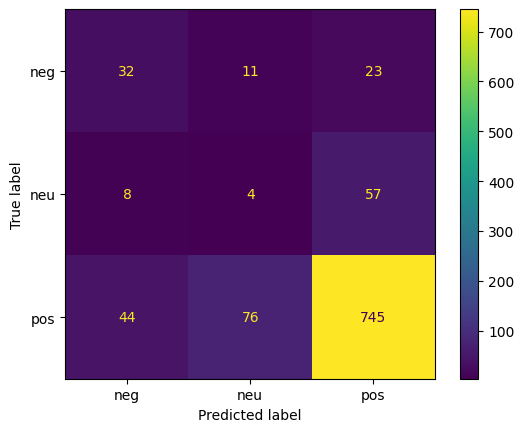

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
cm = confusion_matrix(df_selected['rating_tag'], df_selected['textblob_tag'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['neg','neu','pos'])
disp.plot()

In [ ]:
vader = vaderSentiment.vaderSentiment.SentimentIntensityAnalyzer()

In [ ]:
df_selected['vader_sentiment_polarity'] = df_selected['text'].apply(lambda tweet: vader.polarity_scores(tweet))

<ipython-input-72-0de0d8771f3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['vader_sentiment_polarity'] = df_selected['text'].apply(lambda tweet: vader.polarity_scores(tweet))


In [ ]:
df_selected['compound']  = df_selected['vader_sentiment_polarity'].apply(lambda score_dict: score_dict['compound'])

<ipython-input-73-ba15bb935cc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['compound']  = df_selected['vader_sentiment_polarity'].apply(lambda score_dict: score_dict['compound'])


In [ ]:
def score(compound):
  if compound >= 0.05 :
    return 'pos'
 
  elif compound <= - 0.05 :
    return 'neg'
 
  else :
    return 'neu'

In [ ]:
df_selected['vader_tag'] = df_selected['compound'].apply(score)

<ipython-input-75-f4eeddcbd6f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['vader_tag'] = df_selected['compound'].apply(score)


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(df_selected['rating_tag'],df_selected['vader_tag']))

0.789


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df_selected['rating_tag'],df_selected['vader_tag']))

              precision    recall  f1-score   support

         neg       0.40      0.52      0.45        66
         neu       0.06      0.09      0.07        69
         pos       0.91      0.87      0.89       865

    accuracy                           0.79      1000
   macro avg       0.46      0.49      0.47      1000
weighted avg       0.82      0.79      0.80      1000



In [ ]:
df_selected.groupby(['vader_tag']).size()

vader_tag
neg     84
neu     94
pos    822
dtype: int64

In [ ]:
df_selected.groupby(['rating_tag']).size()

rating_tag
neg     66
neu     69
pos    865
dtype: int64

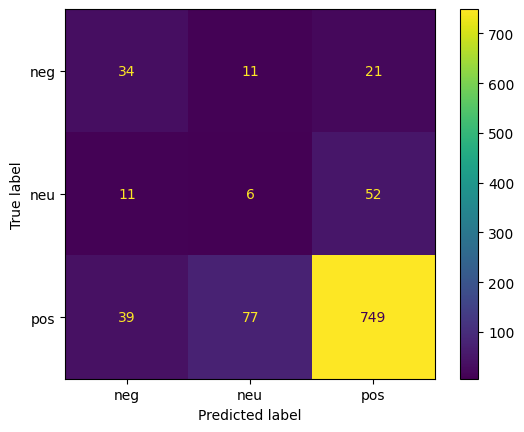

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(df_selected['rating_tag'], df_selected['vader_tag'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['neg','neu','pos'])
disp.plot()


In [ ]:
# dataset extremely unbalanced, most of the ratings are positive.
# when the records of a certain class are much more than the other class, our classifier may get biased towards the prediction
# To solve this problem, we could use resampling (Oversampling and Undersampling), so that the classifier will give equal importance to both classes.

In [ ]:
import seaborn as sns

In [ ]:
# sns.countplot(df_selected['rating_tag'])

Project Phase 2 - Machine Learning

Preprocessing

In [ ]:
# dataset for ML
USEFUL_COLUMNS_ML = ['reviewText','summary','overall']
df_ml = df[USEFUL_COLUMNS_ML]
print(df_ml.head(5))

                                                                                            reviewText  \
0  This worked really well for what I used it for. So for my purposes it is getting full marks. Thi...   
1                                                                     Fast cutting and good adheasive.   
2  Worked great for my lapping bench.  I would like it if the adhesive were backed with waxed paper...   
3                                                                                        As advertised   
4           seems like a pretty good value as opposed to buying it at the big box stores by the sheet.   

                                                      summary  overall  
0            Couldn't have been happier with it's performance      5.0  
1                                                 Good paper.      5.0  
2                                                      Handy!      5.0  
3                                               As advertised      4.0 

Text Cleaning

In [ ]:
# text cleaning for ML
from nltk.stem import PorterStemmer
stemmer= PorterStemmer()
def clean_text_ml(text):
    #to lowercase
    str = text.lower()
    #remove end of line
    str = str.replace("\n"," ")
    # remove stop word and stemming 
    str = " ".join([stemmer.stem(token) for token in str.split() if token not in stop_words_nltk])
    #remove punctuation
    str = "".join([char for char in str if char not in string.punctuation and not char.isdigit()])
    return str

In [ ]:
df_ml['text'] = df_ml['summary'] + " " + df_ml['reviewText']

df_ml['text'] = df_ml['text'].apply(clean_text_ml)

<ipython-input-86-be701d7f6c5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['text'] = df_ml['summary'] + " " + df_ml['reviewText']
<ipython-input-86-be701d7f6c5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['text'] = df_ml['text'].apply(clean_text_ml)


In [ ]:

df_ml.loc[df_ml.overall==3.0,"rating_tag"]="neu"
df_ml.loc[df_ml.overall>3.0,"rating_tag"]="pos"
df_ml.loc[df_ml.overall<3.0,"rating_tag"]="neg"

<ipython-input-87-eadcf40fae79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml.loc[df_ml.overall==3.0,"rating_tag"]="neu"




```
# This is formatted as code
```

Prepare test and training data

In [ ]:
# sampling row for Lexicon as test data for better comparison
df_ml_test = df_ml.loc[df_sample.index.values]
print(df_ml_test.shape)
print(df_ml_test.head(5))
# drop those sampling rows for training data
df_ml_train = df_ml.drop(df_sample.index,axis=0)
# df_ml_train = df_ml_train.reset_index()
print(df_ml_train.shape)
print(df_ml_train.head(5))

(1000, 5)
                                                                                                reviewText  \
66293  Simple and inexpensive toothpaste. You definitely get what you pay for as there is no whitening ...   
58236  quality meter, i bought mostly because i needed milliohm meter and this for a little more money ...   
40450                                                                                      a great product   
11426                                           Used this to replace word out solenoid.  Easy to replace .   
54538  Great color. This is effectively a grey with some reflectivity. Color is perfect for LFS Elephan...   

                                                     summary  overall  \
66293                                              No frills      4.0   
58236                             great meter for the price.      5.0   
40450                                             Five Stars      5.0   
11426                             Fac

In [ ]:
# split 70-30 with same proportion of class
# from sklearn.model_selection import StratifiedShuffleSplit
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=3)
# for train_idx, val_idx in sss.split(df_ml_train, df_ml_train['rating_tag']):
#     data_train = df_ml_train[train_idx]
#     data_val = df_ml_train[val_idx]

In [ ]:
# data_train.value_counts("rating_tag")

In [ ]:
# data_val.value_counts("rating_tag")

In [ ]:

df_ml_train.value_counts("rating_tag")

rating_tag
pos    63738
neu     4124
neg     4106
dtype: int64

In [ ]:
from sklearn.utils import resample
# downsample majarity class
df_marjority = df_ml_train[df_ml_train['rating_tag']=='pos']
df_minority_1 = df_ml_train[df_ml_train['rating_tag']=='neu']
df_minority_2 = df_ml_train[df_ml_train['rating_tag']=='neg']
df_majority_downsampled = resample(df_marjority, 
                                replace=False,     
                                n_samples=15000,    
                                random_state=3)
# Upsample minority class neu
df_minority_upsampled_1 = resample(df_minority_1, 
                                 replace=True,     
                                 n_samples=15000,    
                                 random_state=3)

# Upsample minority class neg
df_minority_upsampled_2 = resample(df_minority_2, 
                                 replace=True,     
                                 n_samples=15000,    
                                 random_state=3)


In [ ]:

df_majority_downsampled.shape

(15000, 5)

In [ ]:
df_ml_train = pd.concat([df_minority_upsampled_1,df_minority_upsampled_2,df_majority_downsampled])
# df_ml_train = pd.concat([df_minority_1,df_minority_2,df_majority_downsampled])

In [ ]:

df_ml_train.shape

(45000, 5)

Text Representation - TFIDF for features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Convert the 'text' column to a list of strings
reviews = df_ml['text'].tolist()
# Initialize the TfidfVectorizer
# vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(max_features=1000)

# Compute the TF-IDF scores for each review
tfidf_train = vectorizer.fit_transform(df_ml_train['text'])
# Convert the results to a Pandas DataFrame
tfidf_df_train = pd.DataFrame(tfidf_train.toarray(), columns=vectorizer.get_feature_names_out())
vocabulary = vectorizer.get_feature_names_out()
print("Vocabulary:", vocabulary)

# Print the text representation
print(tfidf_df_train)

# transform testing data to tfidf
tfidf_test = vectorizer.transform(df_ml_test['text'])
tfidf_df_test = pd.DataFrame(tfidf_test.toarray(), columns=vectorizer.get_feature_names_out())


Vocabulary: ['ab' 'abl' 'abs' 'absolut' 'ac' 'accur' 'accuraci' 'accurate' 'across'
 'actual' 'ad' 'add' 'addit' 'adher' 'adhes' 'adjust' 'advertis'
 'advertised' 'again' 'ago' 'air' 'all' 'allow' 'almost' 'along' 'alreadi'
 'also' 'although' 'aluminum' 'alway' 'am' 'amazon' 'amount' 'and' 'anoth'
 'anyon' 'anyth' 'anything' 'anyway' 'apart' 'app' 'appear' 'appli'
 'applic' 'area' 'arent' 'around' 'arriv' 'ask' 'assembl' 'assort'
 'attach' 'attempt' 'avail' 'avoid' 'away' 'awesom' 'back' 'bad' 'bag'
 'ball' 'bar' 'bare' 'base' 'basic' 'batch' 'batteri' 'battery' 'be'
 'bear' 'becom' 'bed' 'behind' 'believ' 'belt' 'bend' 'bent' 'best'
 'better' 'big' 'bigger' 'bit' 'black' 'blade' 'block' 'blue' 'board'
 'bolt' 'bond' 'bother' 'bottl' 'bottom' 'bought' 'box' 'brand' 'break'
 'bright' 'brittl' 'broke' 'broken' 'brown' 'brush' 'bubbl' 'build'
 'built' 'burn' 'but' 'button' 'buy' 'cabl' 'calibr' 'calip' 'call' 'came'
 'camera' 'can' 'canist' 'cannot' 'cant' 'cap' 'car' 'card' 'care'
 'carp

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
len(vocabulary)

1000

**Handle** Labels

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_ml_train['rating_class'] = le.fit_transform(df_ml_train['rating_tag'])
df_ml_test['rating_class'] = le.transform(df_ml_test['rating_tag'])


Machine Learning Model 1 - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define the model
lr_model = LogisticRegression(random_state=3, solver='lbfgs',
                            multi_class='multinomial')
# Train model
lr_model.fit(tfidf_df_train, df_ml_train['rating_class'])


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=3)

Prediction

In [ ]:
y_pred_lr  = lr_model.predict(tfidf_df_test)
import numpy as np
# print(np.argmax(y_pred_WingYan[0]))
pred_class = y_pred_lr
# print(max_arr)
result = list(zip(pred_class,df_ml_test['rating_class']))
# print(result)

Evaluation for Logistic Regression

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
# Print out the accuracy
print('Accuracy: {0}'.format(accuracy_score(df_ml_test['rating_class'], pred_class)))
# Print out the confusion matrix.
print('Confustion Matrix: \n{0}'.format(confusion_matrix(df_ml_test['rating_class'], pred_class)))
#Print out the classification report.
print ('Classification Report: \n{0}'.format(classification_report(df_ml_test['rating_class'], pred_class)))

Accuracy: 0.812
Confustion Matrix: 
[[ 51  12   3]
 [ 18  39  12]
 [ 49  94 722]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.43      0.77      0.55        66
           1       0.27      0.57      0.36        69
           2       0.98      0.83      0.90       865

    accuracy                           0.81      1000
   macro avg       0.56      0.72      0.61      1000
weighted avg       0.89      0.81      0.84      1000



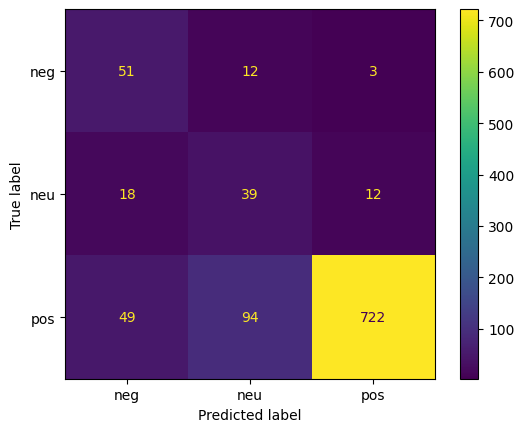

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(df_ml_test['rating_class'], pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['neg','neu','pos'])
disp.plot()

In [ ]:
"""Machine Learning Model 2 - SVM"""

from sklearn.svm import SVC

# Define the model
svm_model = SVC(kernel='linear', C=1.0, random_state=3)

# Train model
svm_model.fit(tfidf_df_train, df_ml_train['rating_class'])


SVC(kernel='linear', random_state=3)

In [ ]:
"""Prediction"""

y_pred_svm = svm_model.predict(tfidf_df_test)
pred_class = y_pred_svm
result = list(zip(pred_class, df_ml_test['rating_class']))
print(result)

[(2, 2), (0, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 1), (0, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (1, 2), (2, 2), (2, 2), (2, 2), (1, 1), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (1, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (1, 2), (2, 2), (0, 0), (2, 2), (2, 2), (2, 1), (2, 2), (2, 2), (2, 2), (1, 2), (1, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 2), (2, 2), (2, 2), (0, 2), (2, 2), (2, 2), (2, 1), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 1), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 1), (2, 2), (1, 2), (0, 1), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 2), (0, 2), (2, 2), (0, 0), (1, 1), (2, 2), (2, 2), (2, 2), (2, 2), (1, 1), (1, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (1, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 1), (2, 2), (1, 2), (2, 2), (0, 0), (0, 0), (1, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2),

In [ ]:
"""Evaluation for SVM"""

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Print out the accuracy
print('Accuracy: {0}'.format(accuracy_score(df_ml_test['rating_class'], pred_class)))
# Print out the confusion matrix.
print('Confustion Matrix: \n{0}'.format(confusion_matrix(df_ml_test['rating_class'], pred_class)))
# Print out the classification report.
print('Classification Report: \n{0}'.format(classification_report(df_ml_test['rating_class'], pred_class)))


Accuracy: 0.797
Confustion Matrix: 
[[ 51  13   2]
 [ 18  39  12]
 [ 62  96 707]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.39      0.77      0.52        66
           1       0.26      0.57      0.36        69
           2       0.98      0.82      0.89       865

    accuracy                           0.80      1000
   macro avg       0.54      0.72      0.59      1000
weighted avg       0.89      0.80      0.83      1000



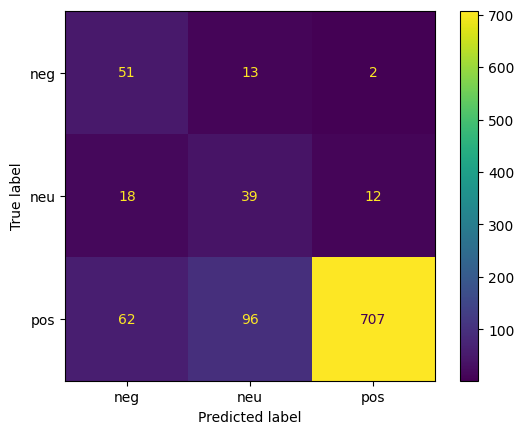

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(df_ml_test['rating_class'], pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['neg', 'neu', 'pos'])
disp.plot()

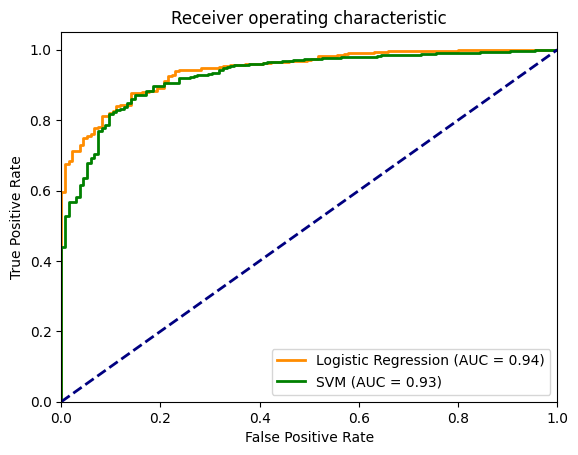

In [ ]:
"""Comparison between Logistic Regression and SVM"""

from sklearn.metrics import roc_curve, auc

# Calculate the predicted probabilities for each model
y_prob_lr = lr_model.predict_proba(tfidf_df_test)
# y_prob_svm = svm_model.decision_function(tfidf_df_test)
p = svm_model.decision_function(tfidf_df_test)
y_prob_svm = np.exp(p)/np.sum(np.exp(p),axis=1, keepdims=True)

# Compute ROC curve and ROC area for logistic regression model
fpr_lr, tpr_lr, _ = roc_curve(df_ml_test['rating_class'], y_prob_lr[:, 2], pos_label=2)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Compute ROC curve and ROC area for SVM model
fpr_svm, tpr_svm, _ = roc_curve(df_ml_test['rating_class'], y_prob_svm[:, 2], pos_label=2)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot the ROC curves for each model
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Logistic Regression
print('Logistic Regression')
print('Precision:', precision_score(df_ml_test['rating_class'], y_pred_lr, average='weighted'))
print('Recall:', recall_score(df_ml_test['rating_class'], y_pred_lr, average='weighted'))
print('F1 Score:', f1_score(df_ml_test['rating_class'], y_pred_lr, average='weighted'))

# SVM
print('\nSVM')
print('Precision:', precision_score(df_ml_test['rating_class'], y_pred_svm, average='weighted'))
print('Recall:', recall_score(df_ml_test['rating_class'], y_pred_svm, average='weighted'))
print('F1 Score:', f1_score(df_ml_test['rating_class'], y_pred_svm, average='weighted'))


Logistic Regression
Precision: 0.8944788883804768
Recall: 0.812
F1 Score: 0.8414243793693479

SVM
Precision: 0.8920809724161277
Recall: 0.797
F1 Score: 0.8301661093257434
